<a href="https://colab.research.google.com/github/abhi66y9085/FUTURE_INTERN_ML_01/blob/main/Future_ML_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Future_Intern/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("✅Dataset loaded successfully")

/content/drive/MyDrive/Future_Intern/archive/NIFTY 100 - HistoricalPE_PBDIV_Data .csv
/content/drive/MyDrive/Future_Intern/archive/INDIA VIX_minute.csv
/content/drive/MyDrive/Future_Intern/archive/Gold price INR.csv
/content/drive/MyDrive/Future_Intern/archive/Data description.txt
/content/drive/MyDrive/Future_Intern/archive/NIFTY 100_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY BANK_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY ENERGY_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY COMMODITIES_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY 50 - HistoricalPE_PBDIV_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY AUTO_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY ENERGY - HistoricalPE_PBDIV_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY BANK - HistoricalPE_PBDIV_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY 50_Data.csv
/content/drive/MyDrive/Future_Intern/archive/NIFTY AUTO - Histor

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from scipy import stats
from pandas.plotting import table
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import os
py.offline.init_notebook_mode(connected=True)

In [4]:
df_nifty50 = pd.read_csv(r"/content/drive/MyDrive/Future_Intern/archive/NIFTY NEXT 50_Data.csv")
df_nifty50.head()

,Date,Open,High,Low,Close
0,12 Aug 2022,42132.00,42298.95,42052.55,42211.40
1,11 Aug 2022,42038.00,42125.95,41937.70,42095.30
2,10 Aug 2022,42026.30,42062.25,41596.80,41748.85
3,08 Aug 2022,41766.85,41930.70,41631.80,41894.15
4,05 Aug 2022,41899.05,42014.15,41612.30,41684.25


In [5]:
df_nifty50.shape

(6414, 5)

In [6]:
df_nifty50.tail()

,Date,Open,High,Low,Close
6409,08 Nov 1996,1000.46,1004.18,1000.46,1004.00
6410,07 Nov 1996,988.83,997.47,988.83,997.06
6411,06 Nov 1996,983.92,991.65,980.21,988.15
6412,05 Nov 1996,1000.31,1000.31,991.00,991.00
6413,04 Nov 1996,NaN,NaN,NaN,1000.00


In [7]:
df_nifty50.describe(include='all')

,Date,Open,High,Low,Close
count,6414,6413.000000,6413.000000,6413.000000,6414.000000
unique,6414,NaN,NaN,NaN,NaN
top,04 Nov 1996,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,12529.444209,12614.373725,12420.085858,12514.308120
std,NaN,11352.507699,11403.767853,11264.560661,11335.088603
min,NaN,911.050000,924.600000,907.020000,912.890000
25%,NaN,2727.350000,2765.400000,2685.600000,2718.675000
50%,NaN,9607.950000,9709.400000,9481.000000,9606.450000
75%,NaN,19900.350000,19987.550000,19783.650000,19890.750000


In [8]:
df_nifty50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6414 entries, 0 to 6413
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6414 non-null   object 
 1   Open    6413 non-null   float64
 2   High    6413 non-null   float64
 3   Low     6413 non-null   float64
 4   Close   6414 non-null   float64
dtypes: float64(4), object(1)
memory usage: 250.7+ KB


In [9]:
df_nifty50['Date'] = pd.to_datetime(df_nifty50['Date'])

In [10]:
df_nifty50.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,0


In [11]:
df_nifty50.fillna(0, inplace=True)

In [12]:
df_nifty50.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


array([[<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>],
       [<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
        <Axes: xlabel='Date'>]], dtype=object)

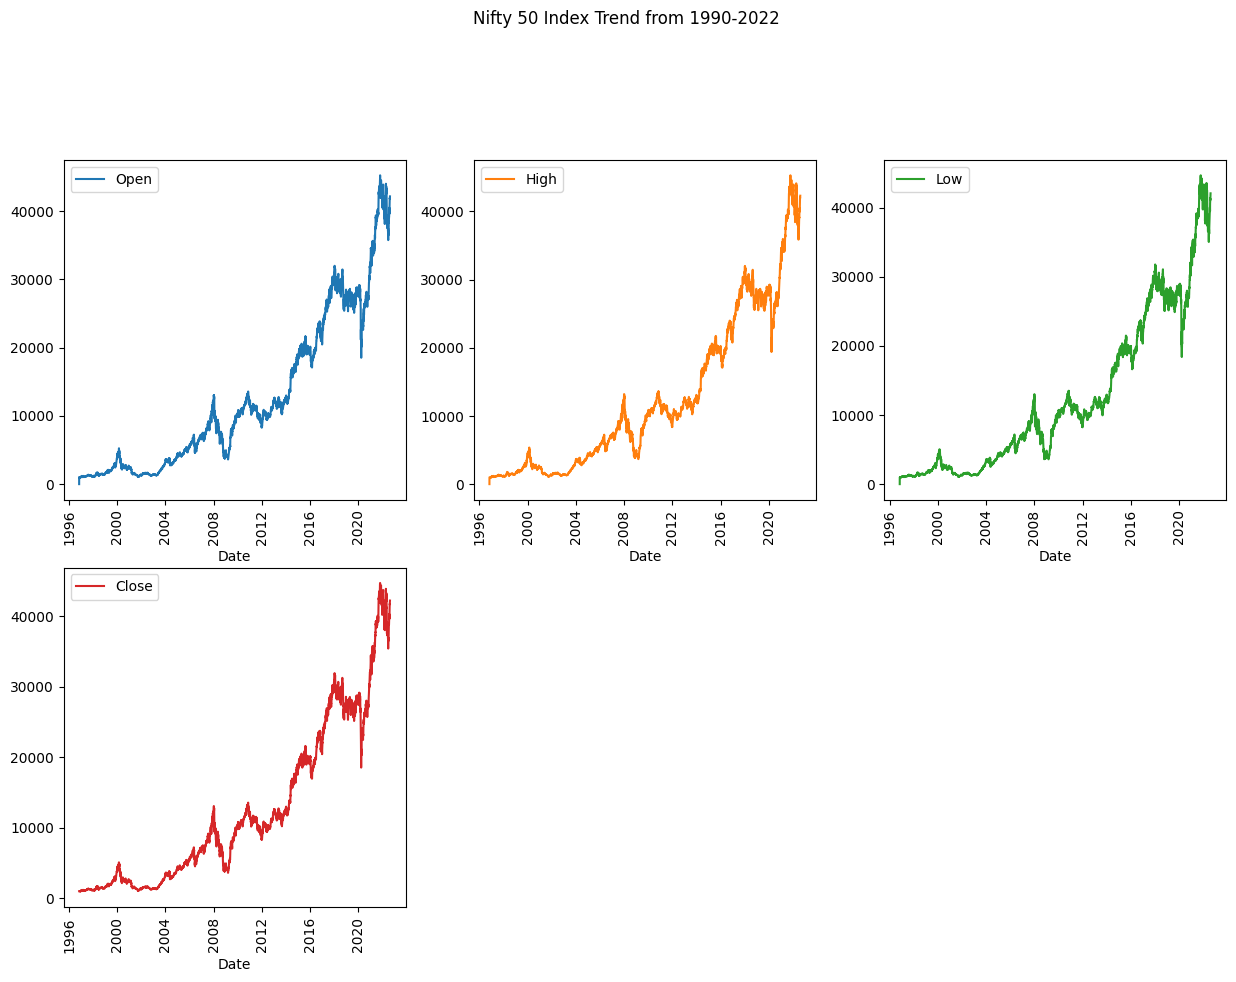

In [13]:
column_list = ['Open', 'High', 'Low', 'Close']
df_nifty50.plot(x="Date", y=column_list, subplots=True, layout=(3,3), figsize=(15,15), sharex=False, title='Nifty 50 Index Trend from 1990-2022', rot=90)

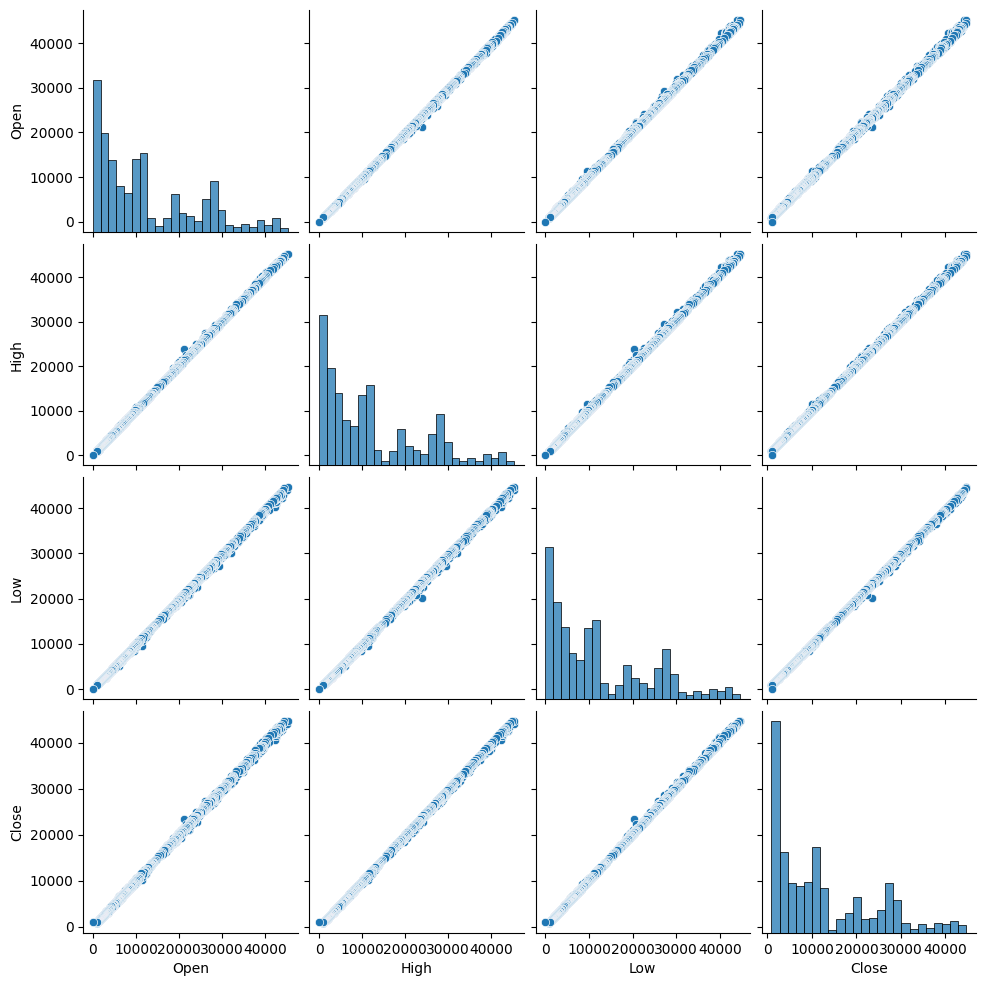

In [14]:
sns.pairplot(df_nifty50)

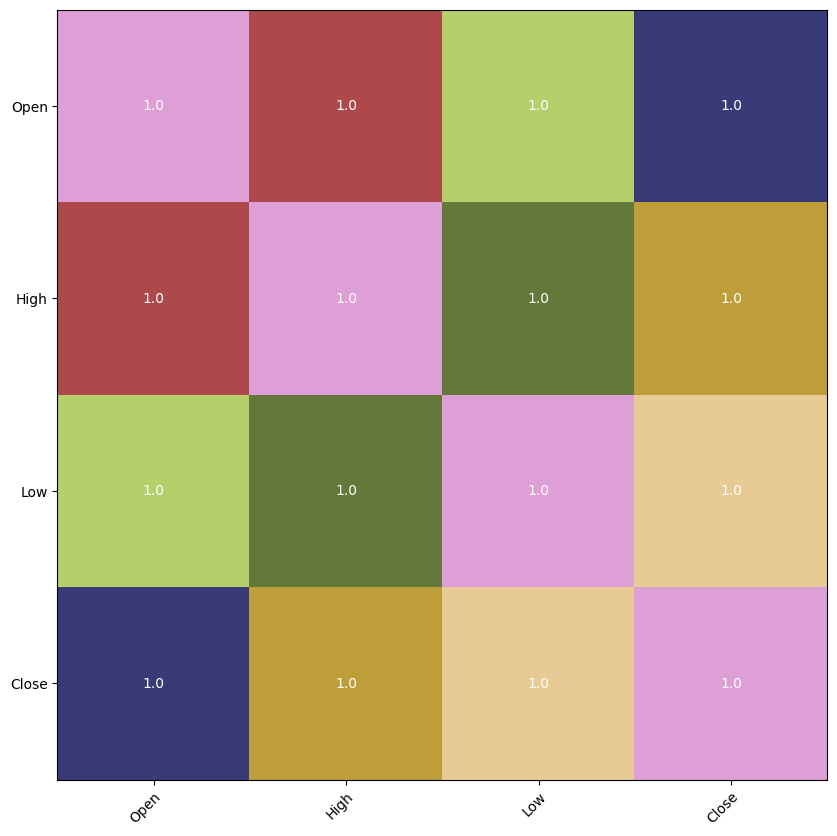

In [15]:
#getting correlation matrix
corr = df_nifty50.drop(columns=['Date']).corr()
fig, ax = plt.subplots(figsize = (10, 10))

#creating a heatmap
# plt.figure(figsize=(20,20))
im = ax.imshow(corr.values,cmap="tab20b")

#setting labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

#Rotating xticklabels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


#looping over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = ax.text(j,i,np.around(corr.iloc[i,j],decimals=2), ha="center", va="center", color="white")

In [16]:
#Correlation Matrix
corr

,Open,High,Low,Close
Open,1.000000,0.999960,0.999918,0.999878
High,0.999960,1.000000,0.999908,0.999935
Low,0.999918,0.999908,1.000000,0.999948
Close,0.999878,0.999935,0.999948,1.000000


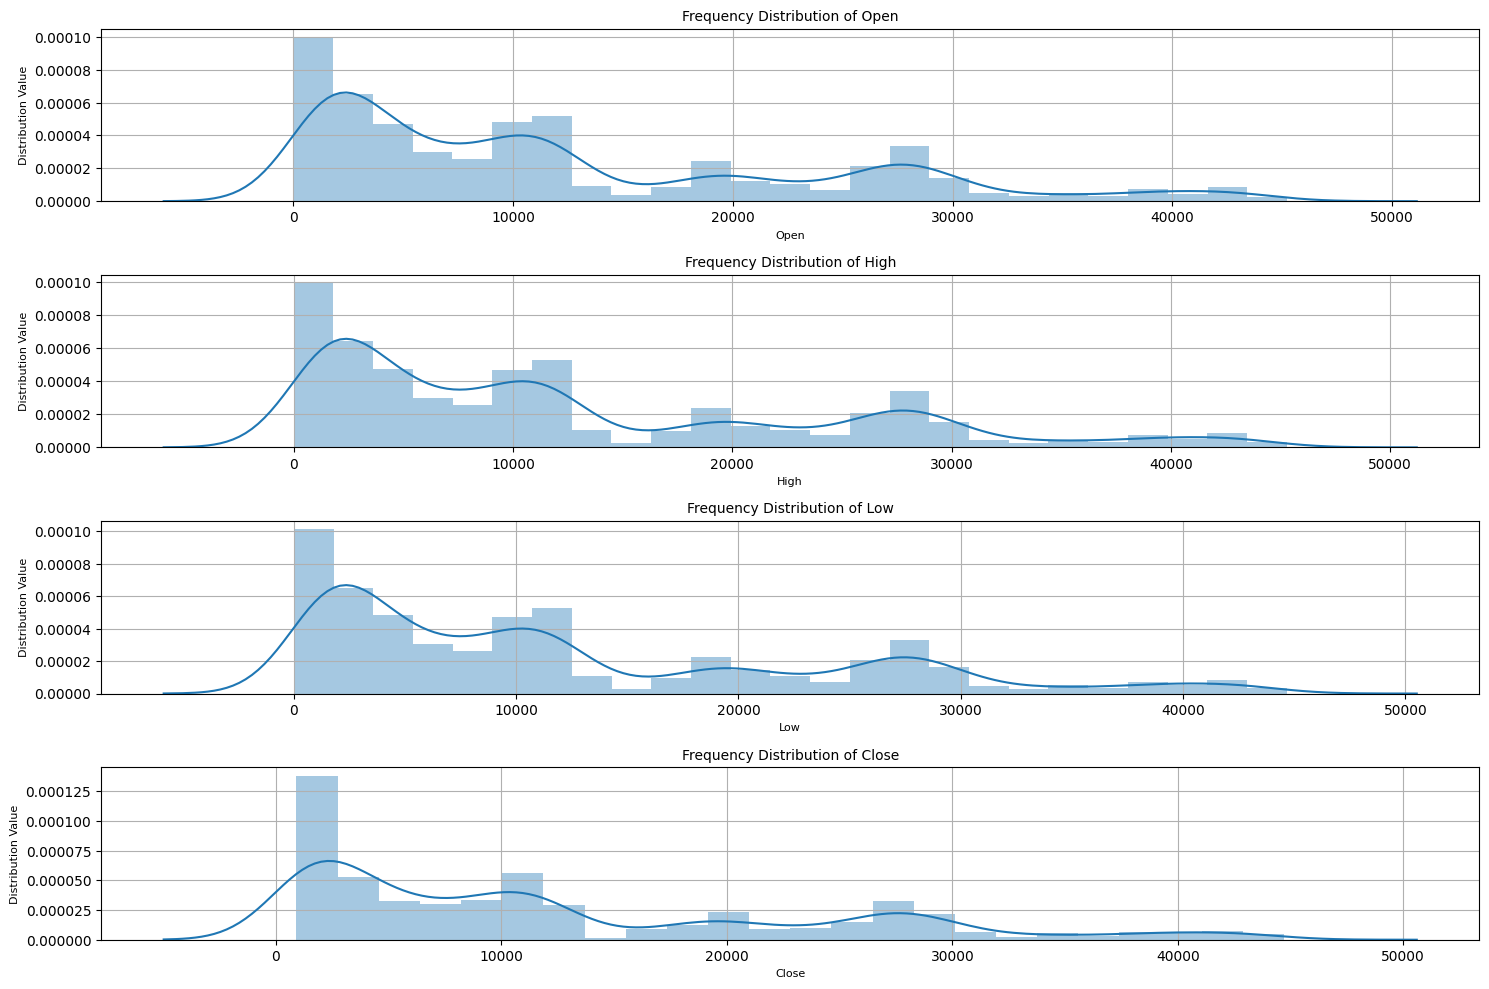

In [17]:
fig, ax = plt.subplots(len(column_list), figsize =(15, 10))

for i, col_list in enumerate(column_list):
  sns.distplot(df_nifty50[col_list], hist = True, ax = ax [i])
  ax[i].set_title ("Frequency Distribution of" + " " + col_list, fontsize = 10)
  ax[i].set_xlabel(col_list, fontsize = 8)
  ax[i].set_ylabel("Distribution Value", fontsize = 8)
  fig.tight_layout (pad = 1.1)

  ax[i].grid('on')


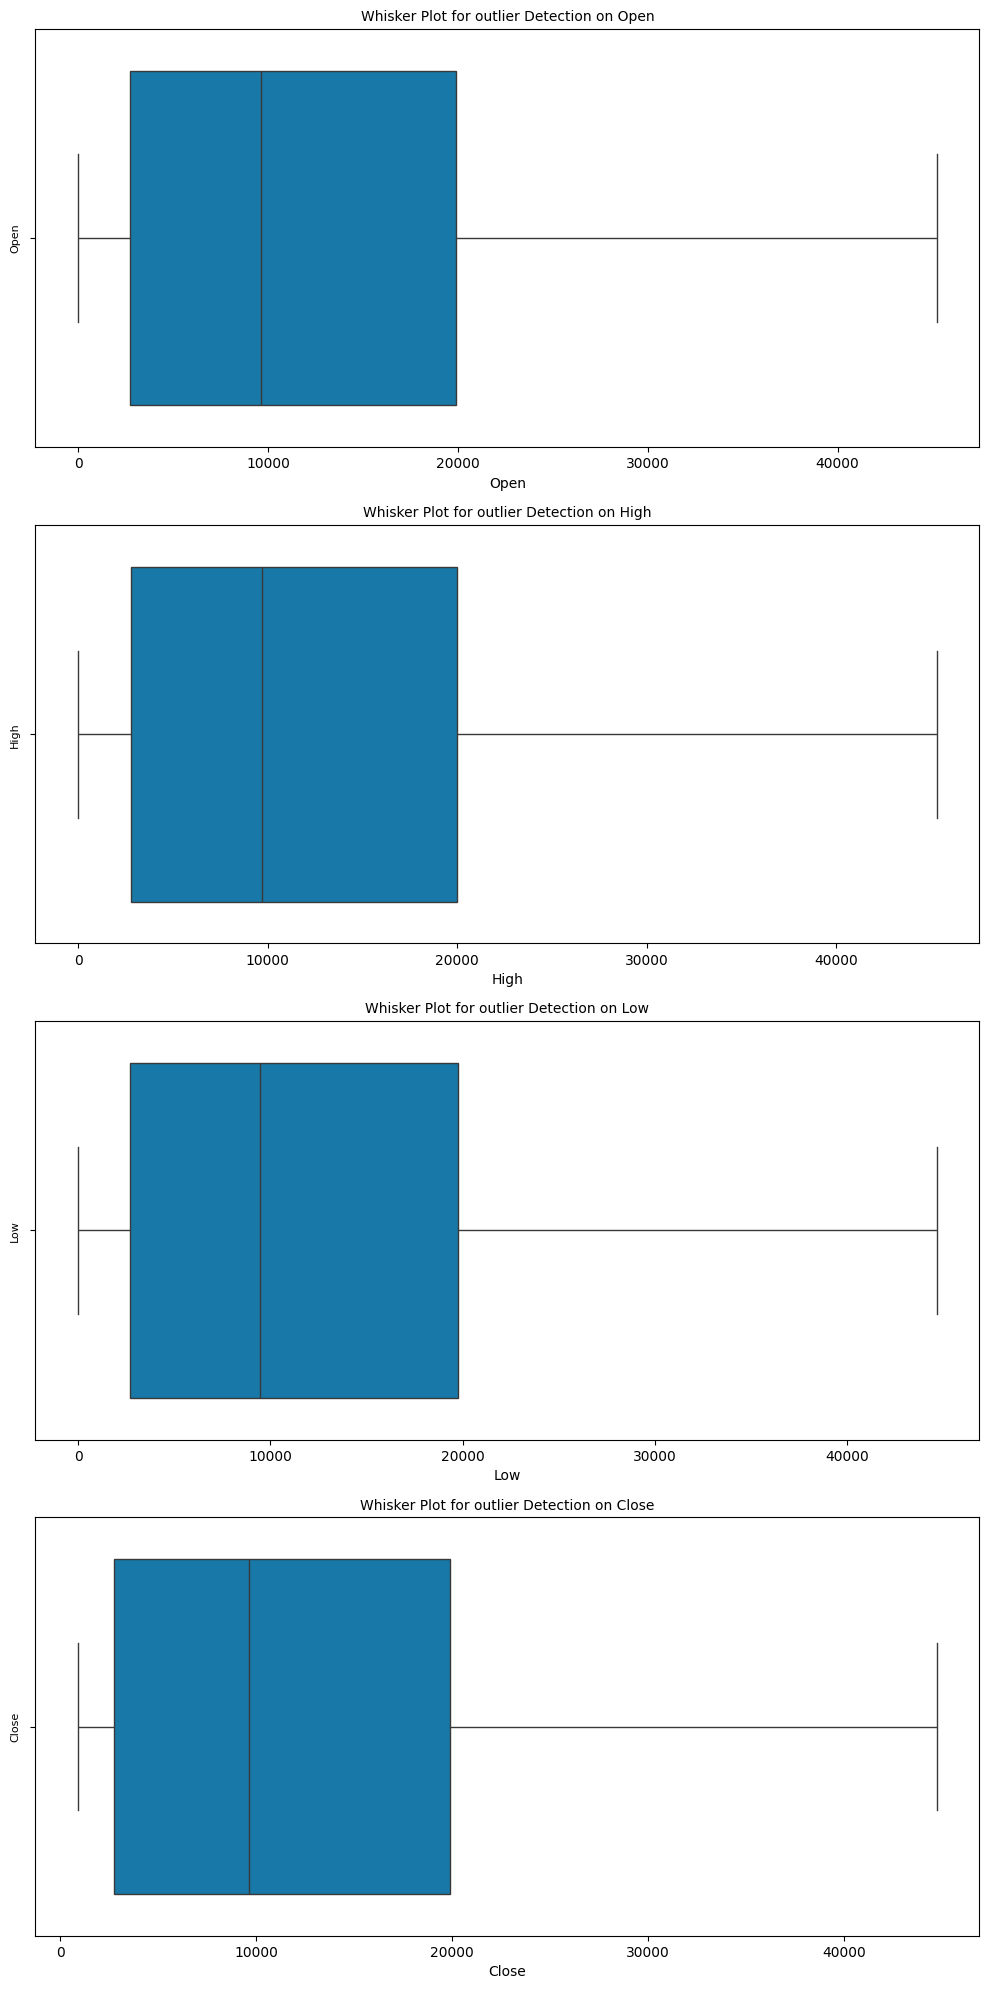

In [18]:
#Outlier Detection and Removal

fig, ax = plt.subplots (len(column_list), figsize = (10, 20))

for i, col_list in enumerate(column_list):
  sns.boxplot(df_nifty50[col_list], ax = ax[i], palette = "winter", orient ='h')
  ax[i].set_title ("Whisker Plot for outlier Detection on" + " " + col_list, fontsize = 10)
  ax[i].set_ylabel(col_list, fontsize = 8)
  fig.tight_layout(pad = 1.1)



In [19]:
#removing the variables either using IQR technique or Z-Score
Descriptive_Statistics = df_nifty50.describe()
Descriptive_Statistics = Descriptive_Statistics.T

#Extracting the IQR values
Descriptive_Statistics['IQR'] = Descriptive_Statistics['75%'] - Descriptive_Statistics['25%']

df_nifty50 = df_nifty50[(np.abs(stats.zscore(df_nifty50[['Open', 'High', 'Low', 'Close']])) < 3).all(axis = 1)]

Data = df_nifty50.reset_index()
Data


,index,Date,Open,High,Low,Close
0,0,2022-08-12,42132.00,42298.95,42052.55,42211.40
1,1,2022-08-11,42038.00,42125.95,41937.70,42095.30
2,2,2022-08-10,42026.30,42062.25,41596.80,41748.85
3,3,2022-08-08,41766.85,41930.70,41631.80,41894.15
4,4,2022-08-05,41899.05,42014.15,41612.30,41684.25
...,...,...,...,...,...,...
6409,6409,1996-11-08,1000.46,1004.18,1000.46,1004.00
6410,6410,1996-11-07,988.83,997.47,988.83,997.06
6411,6411,1996-11-06,983.92,991.65,980.21,988.15
6412,6412,1996-11-05,1000.31,1000.31,991.00,991.00


In [20]:
Data.shape

(6414, 6)

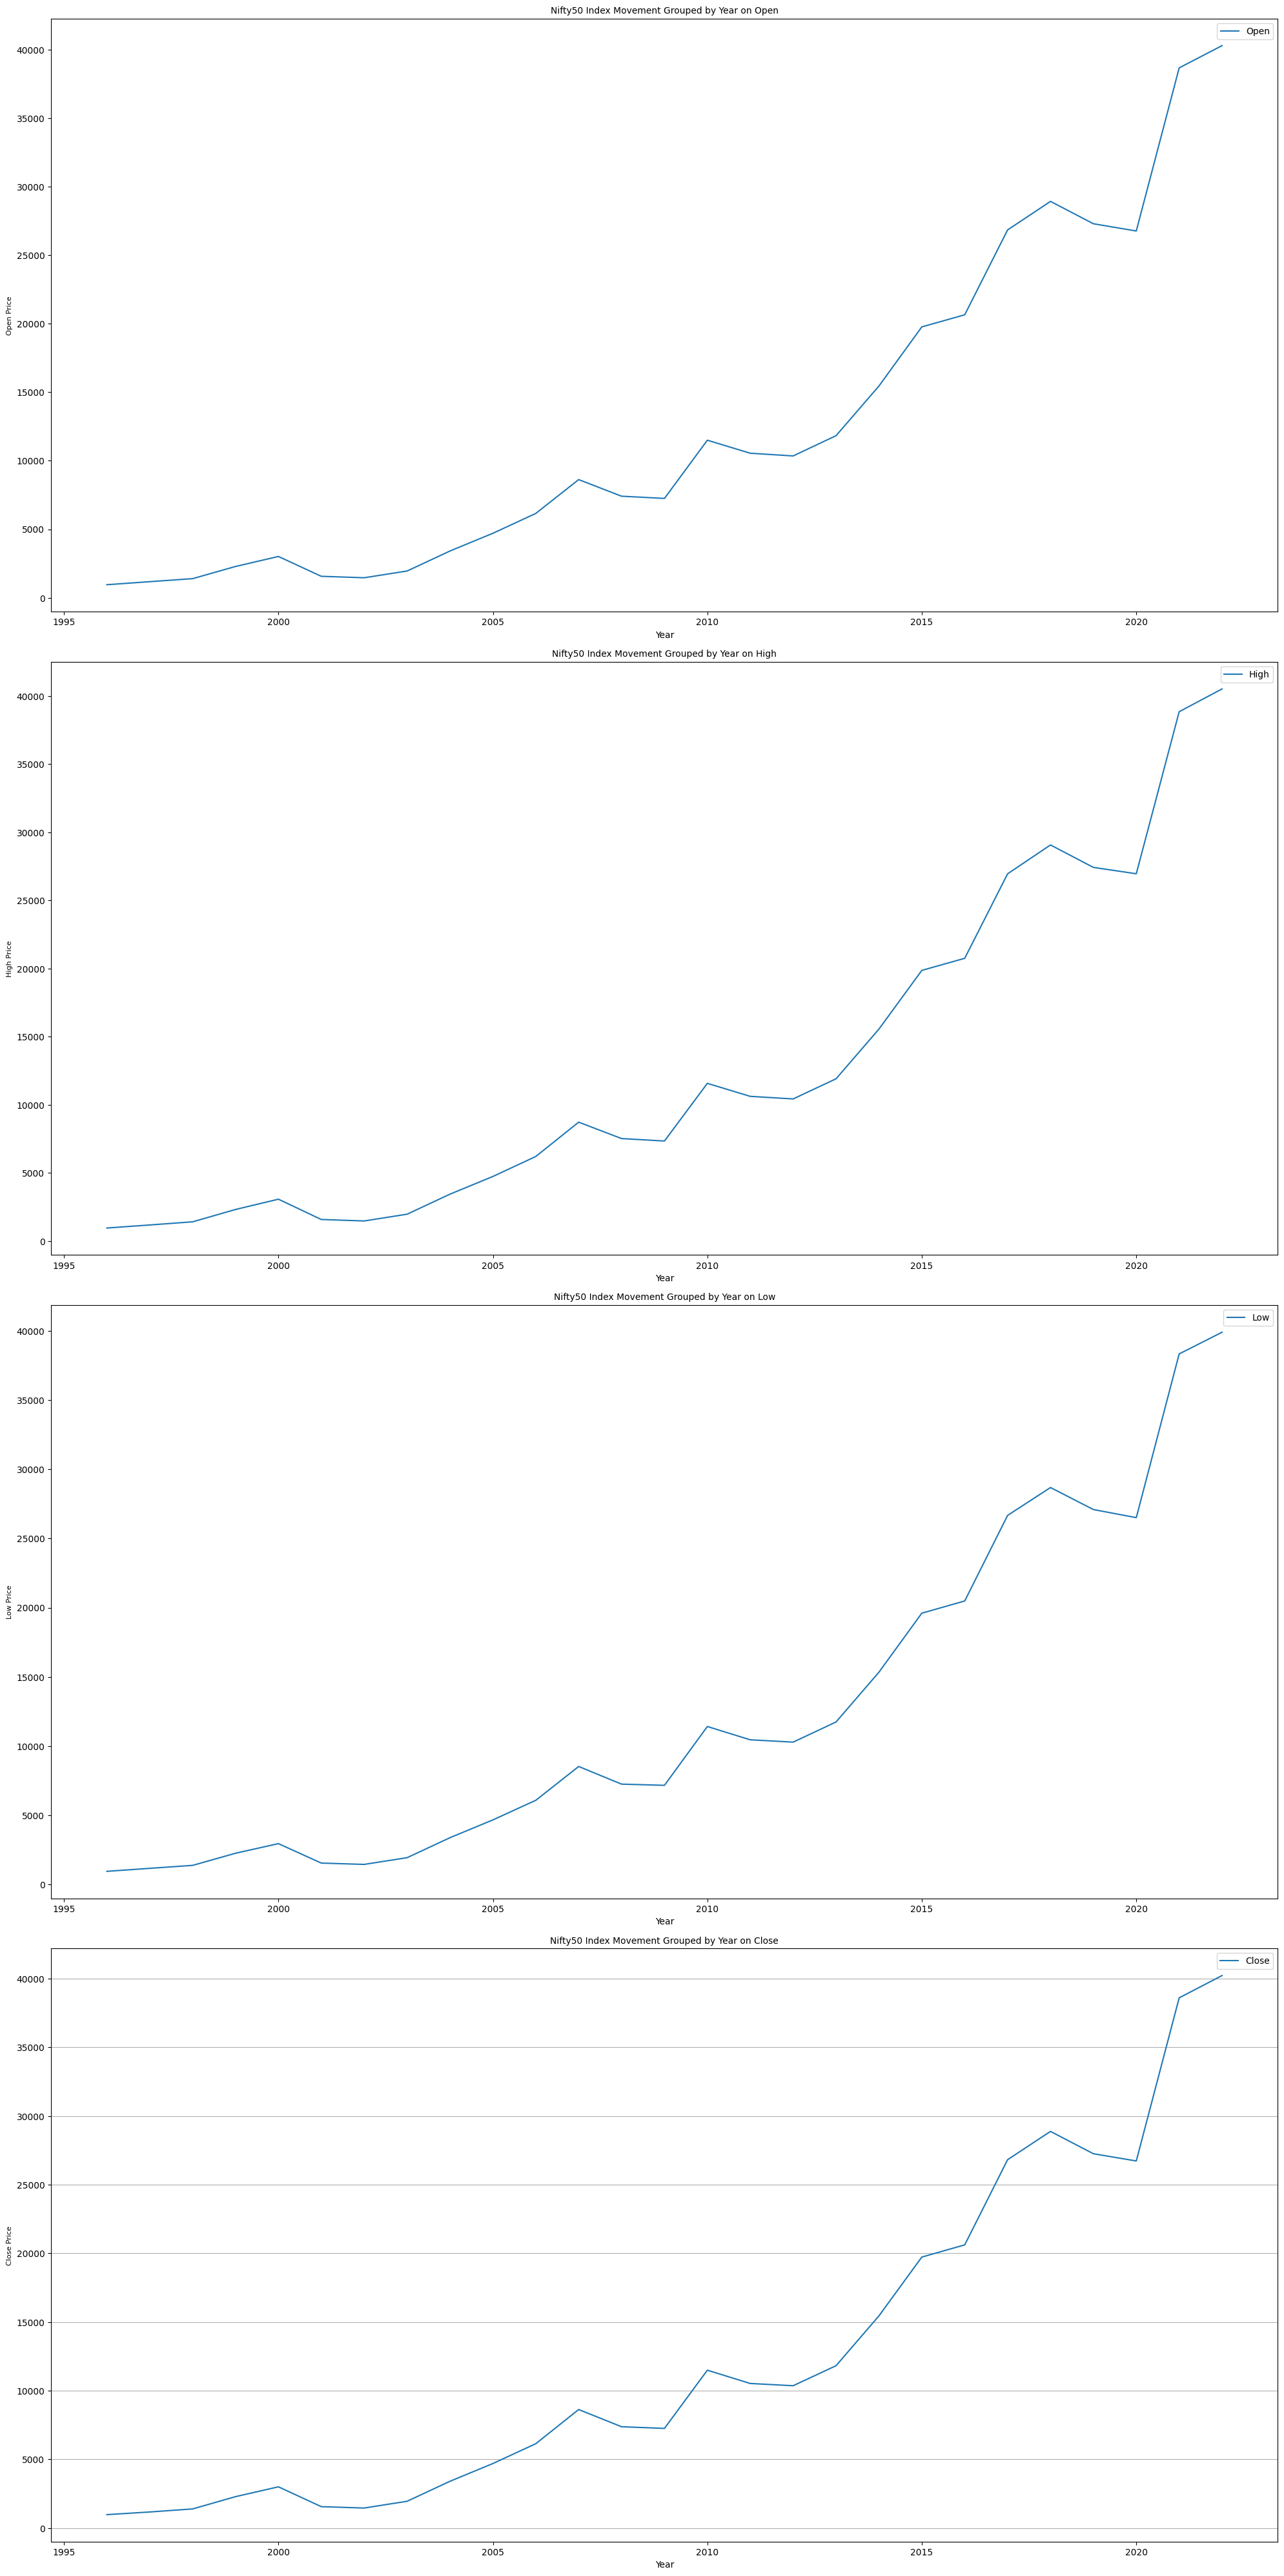

In [21]:
#Extensive Analysis on Historical Data to Find Patterns

Data['Year'] = Data['Date'].dt.year
Data['Month'] = Data['Date'].dt.month
Data['WeekDay'] = Data['Date'].dt.weekday # Corrected to dt.weekday
Data.sort_values(by='Date', ascending=True, inplace=True)

fig, ax = plt.subplots(len(column_list), figsize =(20, 40))


#Grouping the data by year and plot
for i, col_list in enumerate(column_list):
  Data.groupby('Year')[col_list].mean().plot(ax = ax[i], legend = True)

  ax[i].set_title("Nifty50 Index Movement Grouped by Year on" + " " + col_list, fontsize = 10)
  ax[i].set_ylabel(col_list + " " + "Price", fontsize = 8) # Corrected indentation

fig.tight_layout(pad = 1.1)
ax[i].yaxis.grid(True)

In [22]:
df_N50H = pd.read_csv(r'/content/drive/MyDrive/Future_Intern/archive/NIFTY NEXT 50 - HistoricalPE_PBDIV_Data.csv')
df_N50H.head()

,Date,P/E,P/B,Div Yield %
0,12 Aug 2022,22.20,4.34,2.14
1,11 Aug 2022,22.16,4.53,2.15
2,10 Aug 2022,21.97,4.58,2.09
3,08 Aug 2022,22.04,4.60,2.08
4,05 Aug 2022,20.99,4.31,2.23


In [23]:
df_N50H.tail()

,Date,P/E,P/B,Div Yield %
5872,07 Jan 1999,12.69,2.08,1.69
5873,06 Jan 1999,12.57,2.06,1.7
5874,05 Jan 1999,12.41,2.03,1.72
5875,04 Jan 1999,12.26,2.01,1.74
5876,01 Jan 1999,12.12,1.98,1.77


In [24]:
df_N50H.shape

(5877, 4)

In [25]:
df_N50H.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5877 entries, 0 to 5876
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         5877 non-null   object 
 1   P/E          5877 non-null   float64
 2   P/B          5877 non-null   float64
 3   Div Yield %  5877 non-null   object 
dtypes: float64(2), object(2)
memory usage: 183.8+ KB


In [26]:
# changing Date to Datetimeobject
df_N50H['Date'] = pd.to_datetime(df_N50H['Date'])

In [27]:
df_N50H.isnull().sum()

,0
Date,0
P/E,0
P/B,0
Div Yield %,0


In [28]:
Data.head()


,index,Date,Open,High,Low,Close,Year,Month,WeekDay
6413,6413,1996-11-04,0.00,0.00,0.00,1000.00,1996,11,0
6412,6412,1996-11-05,1000.31,1000.31,991.00,991.00,1996,11,1
6411,6411,1996-11-06,983.92,991.65,980.21,988.15,1996,11,2
6410,6410,1996-11-07,988.83,997.47,988.83,997.06,1996,11,3
6409,6409,1996-11-08,1000.46,1004.18,1000.46,1004.00,1996,11,4


In [29]:
Data.tail()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay
4,4,2022-08-05,41899.05,42014.15,41612.30,41684.25,2022,8,4
3,3,2022-08-08,41766.85,41930.70,41631.80,41894.15,2022,8,0
2,2,2022-08-10,42026.30,42062.25,41596.80,41748.85,2022,8,2
1,1,2022-08-11,42038.00,42125.95,41937.70,42095.30,2022,8,3
0,0,2022-08-12,42132.00,42298.95,42052.55,42211.40,2022,8,4


In [30]:
#Merging Data to find more insights based on Close, P/E, P/B, Div Yield%
Data2 = pd.merge(Data, df_N50H, how='outer', on='Date')
Data2.head()

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
0,6413,1996-11-04,0.00,0.00,0.00,1000.00,1996,11,0,NaN,NaN,NaN
1,6412,1996-11-05,1000.31,1000.31,991.00,991.00,1996,11,1,NaN,NaN,NaN
2,6411,1996-11-06,983.92,991.65,980.21,988.15,1996,11,2,NaN,NaN,NaN
3,6410,1996-11-07,988.83,997.47,988.83,997.06,1996,11,3,NaN,NaN,NaN
4,6409,1996-11-08,1000.46,1004.18,1000.46,1004.00,1996,11,4,NaN,NaN,NaN


In [31]:
Data2.shape

(6414, 12)

In [32]:
#sorting data as per date
Data2 = Data2.sort_values(by='Date',ascending=False)
Data2.tail()


,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
4,6409,1996-11-08,1000.46,1004.18,1000.46,1004.00,1996,11,4,NaN,NaN,NaN
3,6410,1996-11-07,988.83,997.47,988.83,997.06,1996,11,3,NaN,NaN,NaN
2,6411,1996-11-06,983.92,991.65,980.21,988.15,1996,11,2,NaN,NaN,NaN
1,6412,1996-11-05,1000.31,1000.31,991.00,991.00,1996,11,1,NaN,NaN,NaN
0,6413,1996-11-04,0.00,0.00,0.00,1000.00,1996,11,0,NaN,NaN,NaN


In [33]:
Data2.describe(include="all")

,index,Date,Open,High,Low,Close,Year,Month,WeekDay,P/E,P/B,Div Yield %
count,6414.000000,6414,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,5877.000000,5877.000000,5877
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,577
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.15
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104
mean,3206.500000,2009-09-13 16:06:57.586529536,12527.490756,12612.407031,12418.149456,12514.308120,2009.204708,6.493452,2.009199,21.161006,2.897318,NaN
min,0.000000,1996-11-04 00:00:00,0.000000,0.000000,0.000000,912.890000,1996.000000,1.000000,0.000000,5.040000,0.810000,NaN
25%,1603.250000,2003-04-08 06:00:00,2720.150000,2764.950000,2685.000000,2718.675000,2003.000000,4.000000,1.000000,14.360000,2.200000,NaN
50%,3206.500000,2009-09-07 12:00:00,9607.925000,9705.450000,9477.225000,9606.450000,2009.000000,6.000000,2.000000,17.600000,2.880000,NaN
75%,4809.750000,2016-02-21 06:00:00,19900.037500,19987.325000,19783.212500,19890.750000,2016.000000,9.000000,3.000000,24.750000,3.590000,NaN
max,6413.000000,2022-08-12 00:00:00,45216.550000,45290.800000,44657.000000,44708.100000,2022.000000,12.000000,6.000000,97.110000,7.090000,NaN


In [34]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6414 entries, 6413 to 0
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        6414 non-null   int64         
 1   Date         6414 non-null   datetime64[ns]
 2   Open         6414 non-null   float64       
 3   High         6414 non-null   float64       
 4   Low          6414 non-null   float64       
 5   Close        6414 non-null   float64       
 6   Year         6414 non-null   int32         
 7   Month        6414 non-null   int32         
 8   WeekDay      6414 non-null   int32         
 9   P/E          5877 non-null   float64       
 10  P/B          5877 non-null   float64       
 11  Div Yield %  5877 non-null   object        
dtypes: datetime64[ns](1), float64(6), int32(3), int64(1), object(1)
memory usage: 576.3+ KB


In [35]:
Data2.isnull().sum()

,0
index,0
Date,0
Open,0
High,0
Low,0
Close,0
Year,0
Month,0
WeekDay,0
P/E,537


In [36]:
# Dropping null values

Data2.dropna(inplace=True)

In [37]:
Data2.isnull().sum()

,0
index,0
Date,0
Open,0
High,0
Low,0
Close,0
Year,0
Month,0
WeekDay,0
P/E,0


In [38]:
# Converting object into float
Data2['Div Yield %'] = pd.to_numeric(Data2['Div Yield %'],errors = 'coerce')

Data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5877 entries, 6413 to 533
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   index        5877 non-null   int64         
 1   Date         5877 non-null   datetime64[ns]
 2   Open         5877 non-null   float64       
 3   High         5877 non-null   float64       
 4   Low          5877 non-null   float64       
 5   Close        5877 non-null   float64       
 6   Year         5877 non-null   int32         
 7   Month        5877 non-null   int32         
 8   WeekDay      5877 non-null   int32         
 9   P/E          5877 non-null   float64       
 10  P/B          5877 non-null   float64       
 11  Div Yield %  5876 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(3), int64(1)
memory usage: 528.0 KB


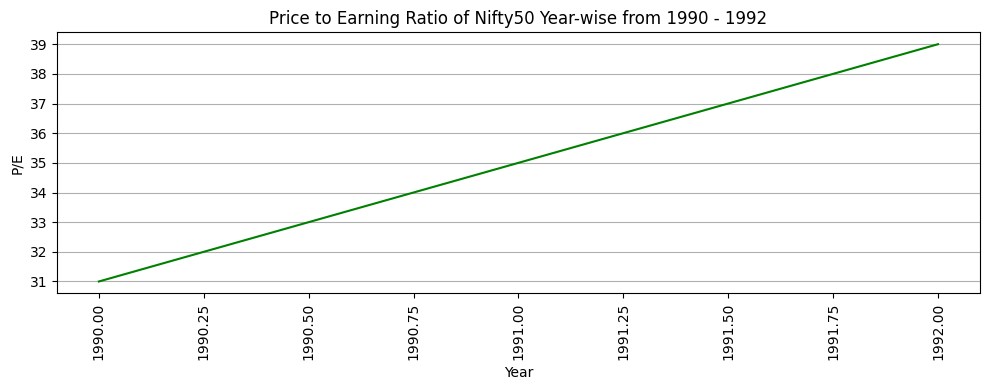

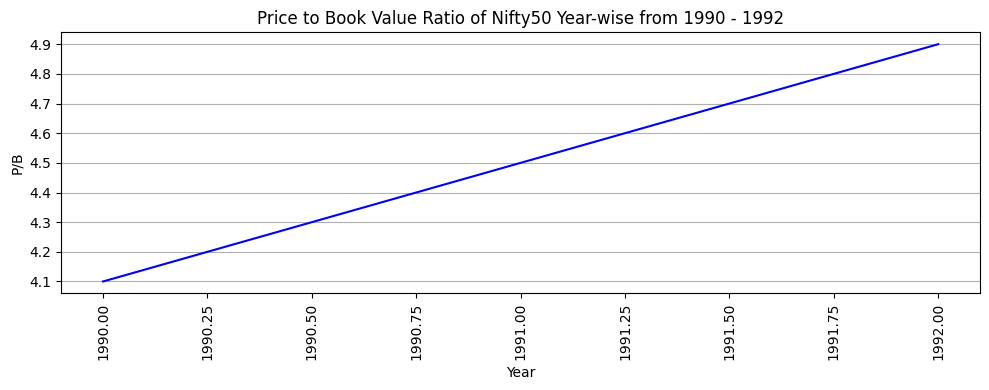

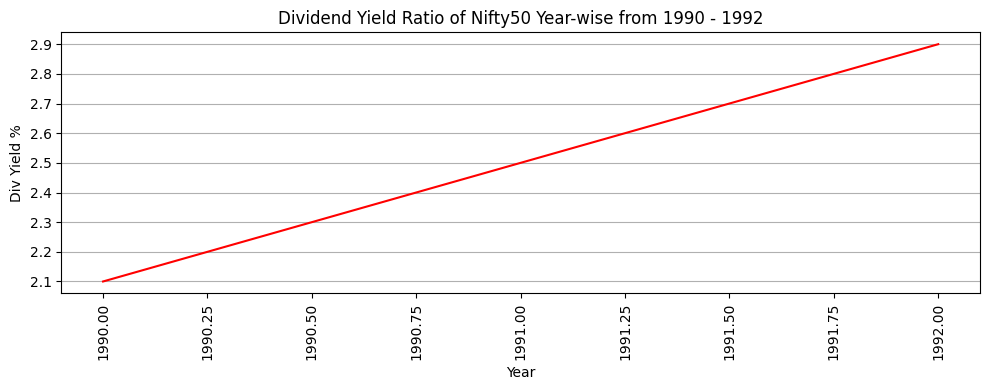

In [39]:


# Sample Data (replace with actual data)
data = {'Year': [1990, 1990, 1991, 1991, 1992, 1992],
        'P/E': [15, 16, 17, 18, 19, 20],
        'P/B': [2, 2.1, 2.2, 2.3, 2.4, 2.5],
        'Div Yield %': [1, 1.1, 1.2, 1.3, 1.4, 1.5]}
Data2 = pd.DataFrame(data)

# Visualizing Price to Earning Ratio of Nifty50 grouped year-wise
check = Data2.groupby('Year')['P/E'].sum()
plt.figure(figsize=(10, 4))  # Adjusted figure size
ax1 = plt.subplot(111)  # Changed to 111 for a single plot
check.plot(
    y="P/E",
    legend=False,
    fontsize=10,  # Adjusted fontsize
    rot=90,
    color="green",
    title="Price to Earning Ratio of Nifty50 Year-wise from 1990 - 1992",  # Adjusted Title and Year Range
    ax=ax1,  # Specify the axes to plot on
)
ax1.ticklabel_format(useOffset=False, style="plain")
ax1.set_ylabel("P/E")
ax1.yaxis.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


# Visualizing Price to Book Value of Nifty50 grouped year-wise
check = Data2.groupby('Year')['P/B'].sum()
plt.figure(figsize=(10, 4))  # Adjusted figure size
ax1 = plt.subplot(111)  # Changed to 111 for a single plot
check.plot(
    y="P/B",
    legend=False,
    fontsize=10,  # Adjusted fontsize
    rot=90,
    color="blue",
    title="Price to Book Value Ratio of Nifty50 Year-wise from 1990 - 1992",  # Adjusted Title and Year Range
    ax=ax1,  # Specify the axes to plot on
)
ax1.ticklabel_format(useOffset=False, style="plain")
ax1.set_ylabel("P/B")
ax1.yaxis.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

# Visualizing Dividend Yield of Nifty50 grouped year-wise
check = Data2.groupby('Year')['Div Yield %'].sum()
plt.figure(figsize=(10, 4))  # Adjusted figure size
ax1 = plt.subplot(111)  # Changed to 111 for a single plot
check.plot(
    y="Div Yield %",
    legend=False,
    fontsize=10,  # Adjusted fontsize
    rot=90,
    color="red",
    title="Dividend Yield Ratio of Nifty50 Year-wise from 1990 - 1992",  # Adjusted Title and Year Range
    ax=ax1,  # Specify the axes to plot on
)
ax1.ticklabel_format(useOffset=False, style="plain")
ax1.set_ylabel("Div Yield %")
ax1.yaxis.grid(True)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [40]:
Data2.columns

Index(['Year', 'P/E', 'P/B', 'Div Yield %'], dtype='object')

In [41]:
column_list = ['Open', 'High', 'Low', 'Close', 'Year', 'Month', 'WeekDay','P/E', 'P/B', 'Div Yield %']

Index(['Year', 'P/E', 'P/B', 'Div Yield %'], dtype='object')


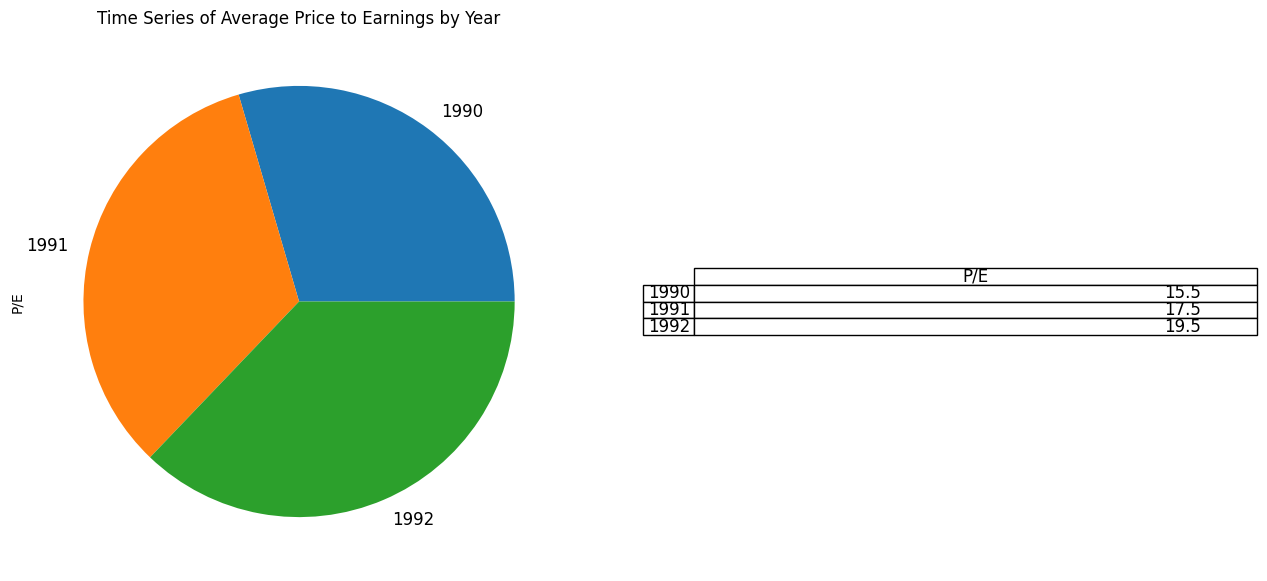

In [42]:
# Analysia based on the Year how much Price to Earnings is generated.
print(Data2.columns)

var = Data2.groupby('Year')['P/E'].mean()
var = pd.DataFrame(var) # Converting this result into a DataFrame.

# Plotting to understand the trend
plt.figure(figsize=(16, 7))
ax1 = plt.subplot(121)


var.plot(kind="pie", y="P/E", legend=False, fontsize=12,
         sharex=False, title="Time Series of Average Price to Earnings by Year", ax=ax1)

# Plotting the table to identify numbers
ax2 = plt.subplot(122)
plt.axis('off')
tbl = table(ax2, var, loc='center')
tbl.auto_set_font_size(False)
tbl.set_fontsize(12)
plt.show()

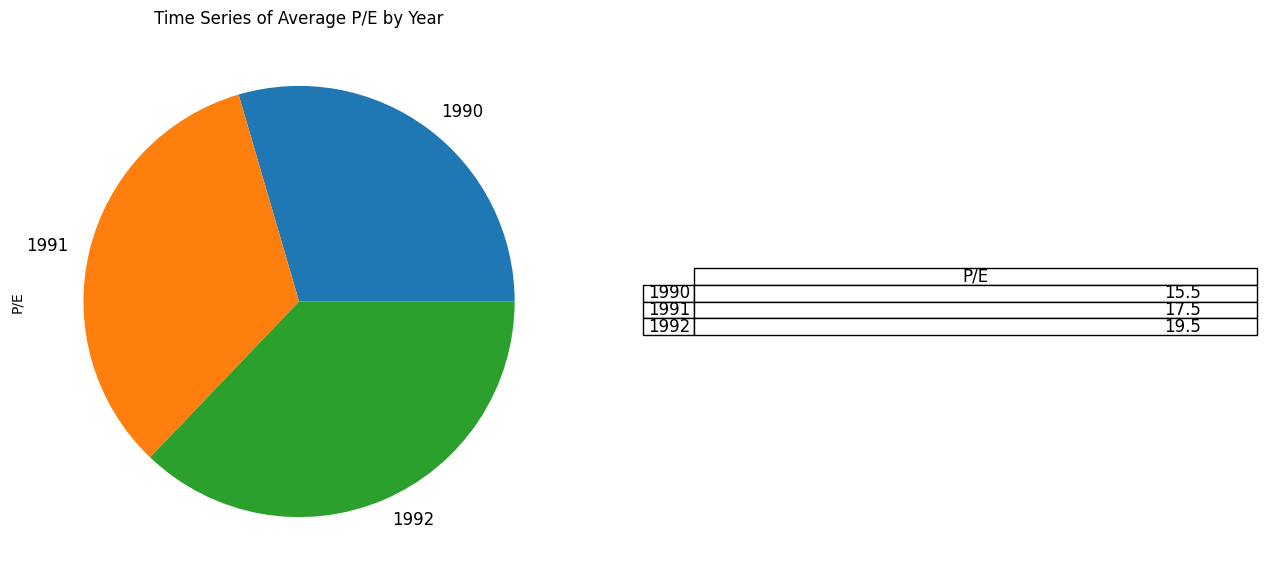

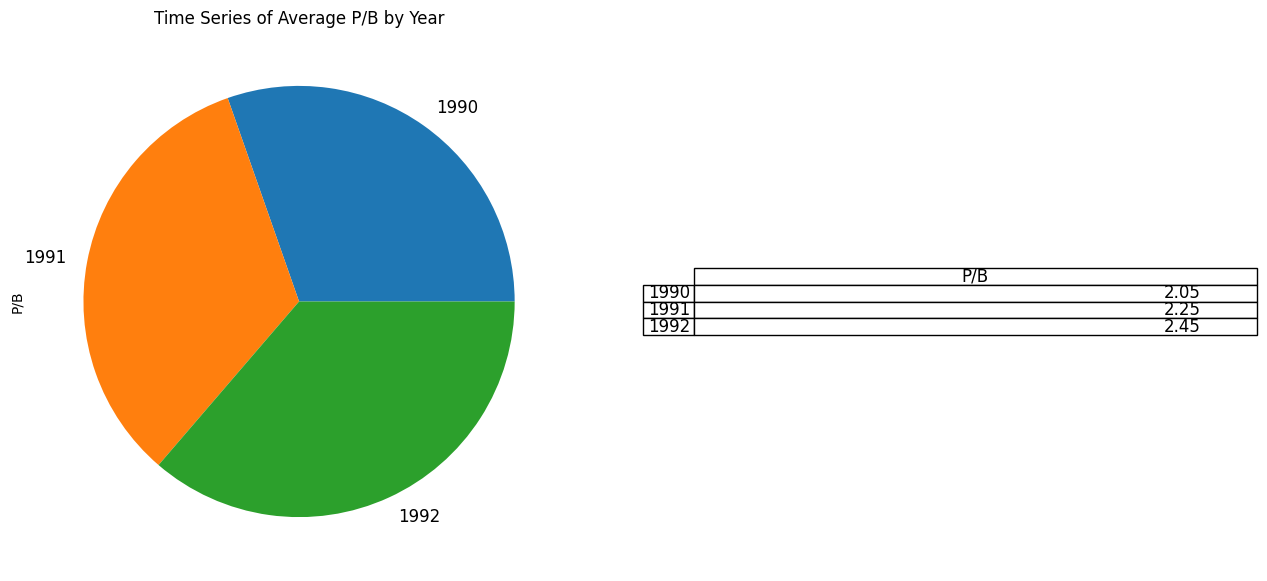

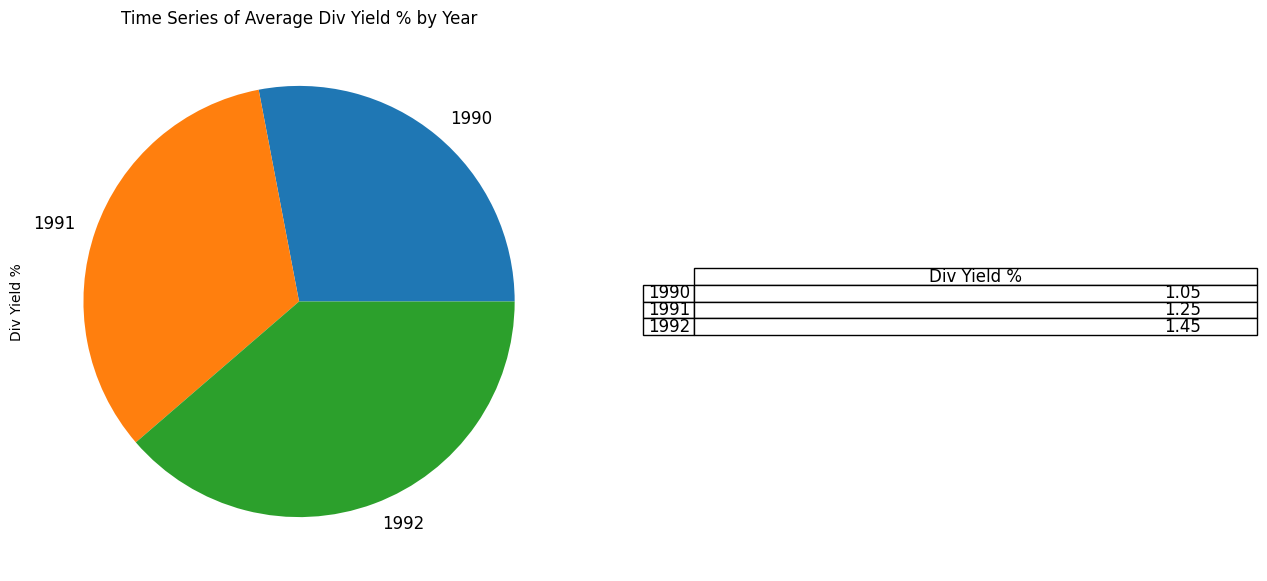

In [44]:
# Analysis based on the Year how much Price to Earnings is generated.
for col_list in Data2.columns[1:]:  # Iterate over columns in Data2 after 'Year'
    var = Data2.groupby('Year')[col_list].mean()
    var = pd.DataFrame(var)

    # Plotting to understand the trend. Notice I have changed title and y column
    plt.figure(figsize=(16, 7))
    ax1 = plt.subplot(121)
    var.plot(kind="pie", y=col_list, legend=False, fontsize=12,
             sharex=False, title=f"Time Series of Average {col_list} by Year", ax=ax1)

    # Plotting the table to identify numbers
    ax2 = plt.subplot(122)
    plt.axis('off')
    tbl = table(ax2, var, loc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(12)
    plt.show()